# Brief of Project

The project is made on Customer Churn Analysis. The project contains various markdown cells indicating starting of specific sections and brief methodology has also been reported for the same.

# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

In [3]:
df=pd.read_csv('Dataset.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
df.shape

(7043, 21)

In [44]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Removing NULL Values

In [11]:
for col in df.columns:
    if df[col].isna().sum()!=0:
        print(col,df[col].isna().sum())

Since there is no output this means the data we have doesn't contain NULL values. 

## Removing Duplicate Values

In [12]:
num_duplicates = df.duplicated().sum()
print(f"There are {num_duplicates} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


There are no duplicate rows 

## Detecting Outliers

In [28]:
columns=['tenure','MonthlyCharges','TotalCharges']
for col in columns:
    med=df['tenure'].median()
    fq=df['tenure'].quantile(0.25)
    tq=df['tenure'].quantile(0.75)
    iqr=tq-fq
    lower_bound = med - (1.5 * iqr)
    upper_bound = med + (1.5 * iqr)

    outlier_count = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)].shape[0]
    print(outlier_count)

0
0
0


No outliers in tenure,monthly billings and total billings of customer

Overall the dataset was really clean as it had no null values or  monthly billings or total billings 

# Exploratory Data Analysis

In [76]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_Encoded
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Correlations

In [68]:
df['Churn_Encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

AttributeError: Can only use .str accessor with string values!

In [74]:
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Encoded']
corr_matrix = df[numeric_cols].corr()

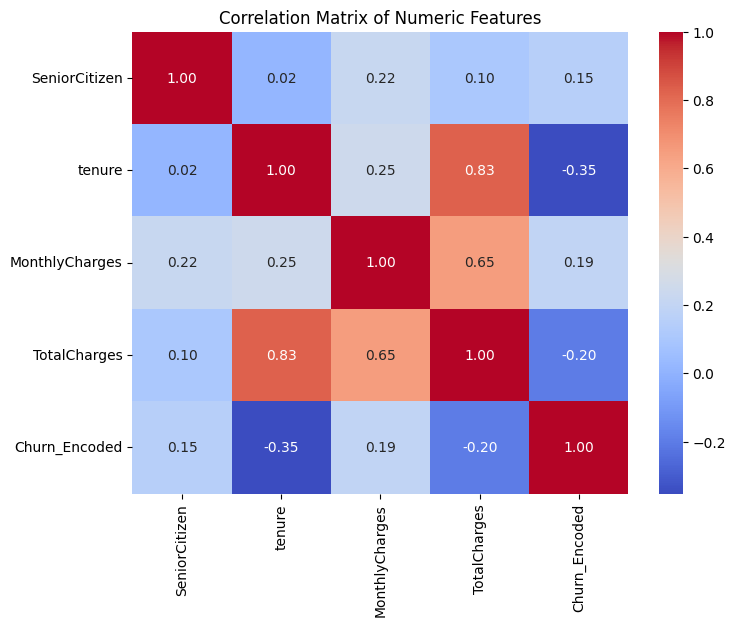

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Observation: A strong correlation can be seen between totalcharges and tenure and total charges and monthly charges

# Visualizations

## Online Security vs Internet Service

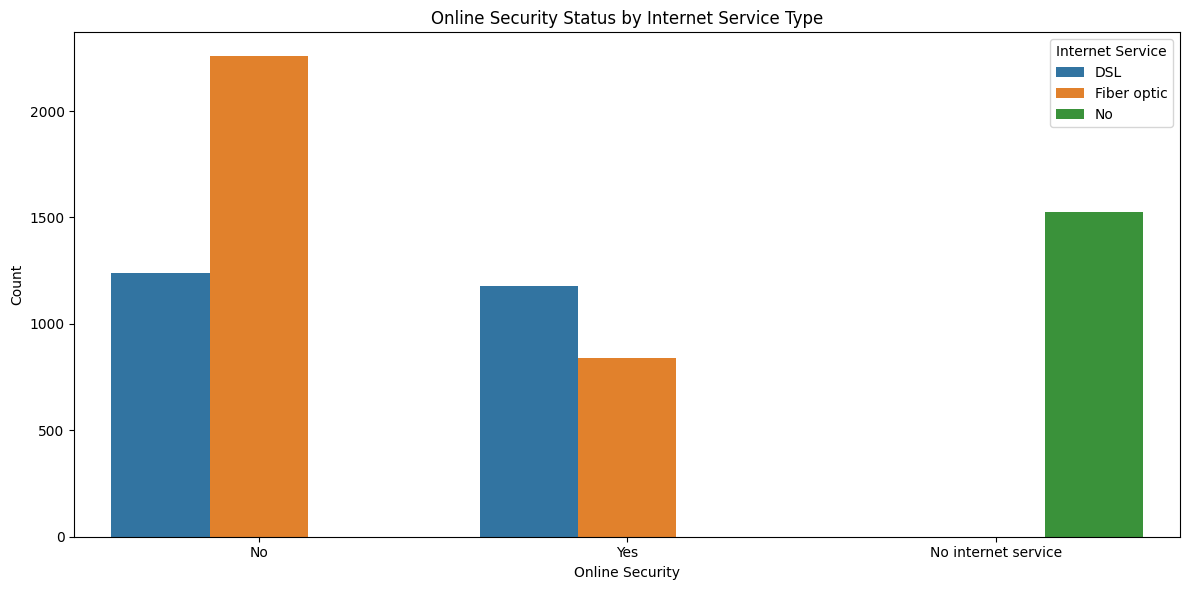

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineSecurity', hue='InternetService', data=df)

plt.title('Online Security Status by Internet Service Type')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Internet Service')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Observations:
Most people who use fiber optic don't have internet service.

## Internet Service vs Online Backup

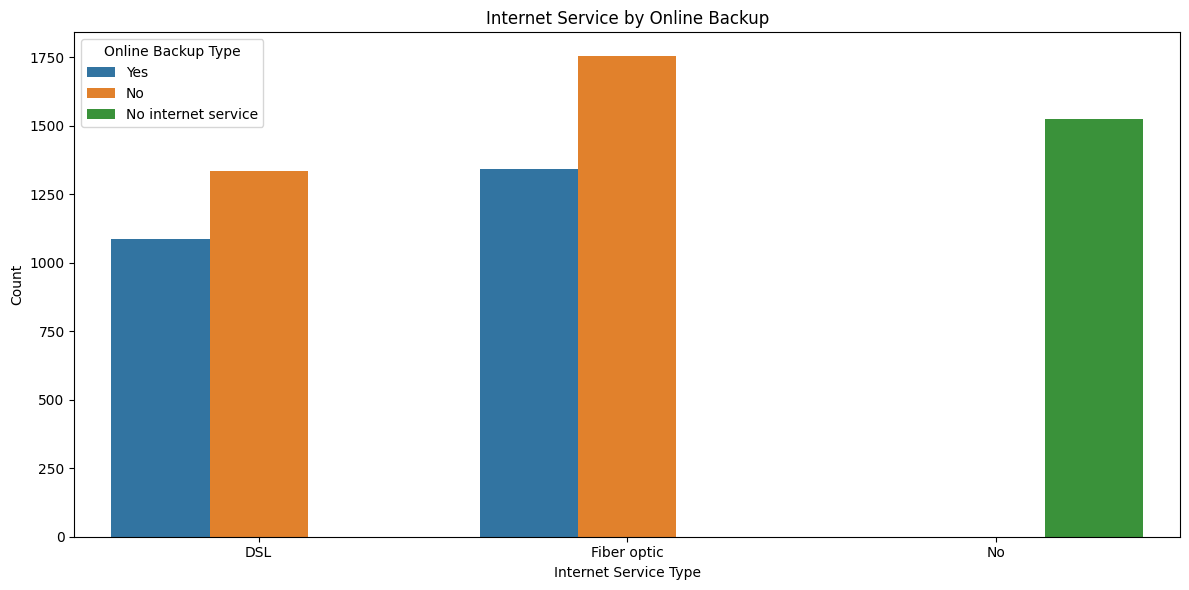

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='InternetService',hue='OnlineBackup',data=df)
plt.title('Internet Service by Online Backup')
plt.legend(title='Online Backup Type')
plt.ylabel('Count')
plt.xlabel('Internet Service Type')
plt.tight_layout()
plt.show()

Observation: Most people don't have online backup 

## Distributions

### Gender

#### Overall

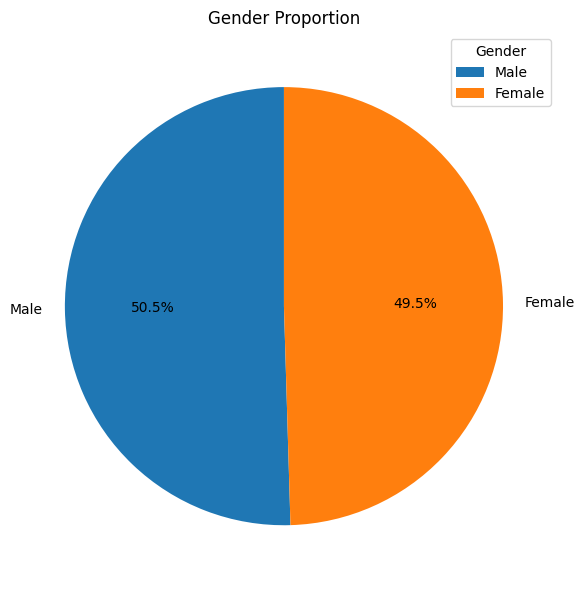

In [79]:
plt.figure(figsize=(12,6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Proportion')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

The dataset is almost balanced for male and female

#### Churn

In [81]:
churned=df[df['Churn']=='Yes']
churned

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Encoded
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,1
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1


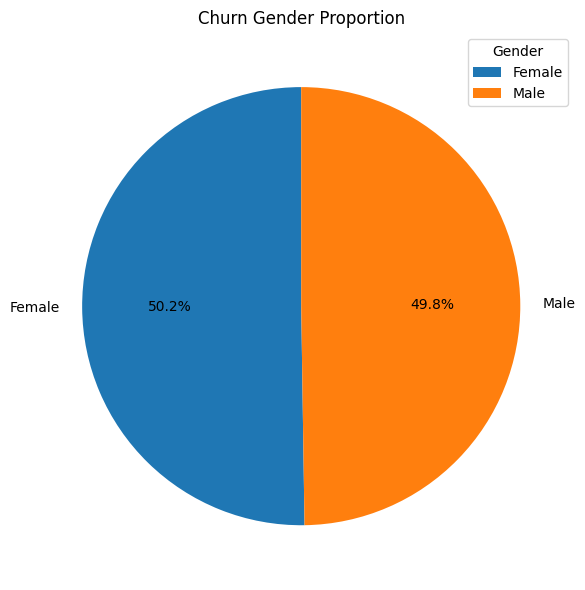

In [83]:
plt.figure(figsize=(12,6))
gender_counts = churned['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Gender Proportion')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

It is evident that females are slightly more likely to leave rather than males although the percentage is almost the same. 

### Contracts

#### Overall

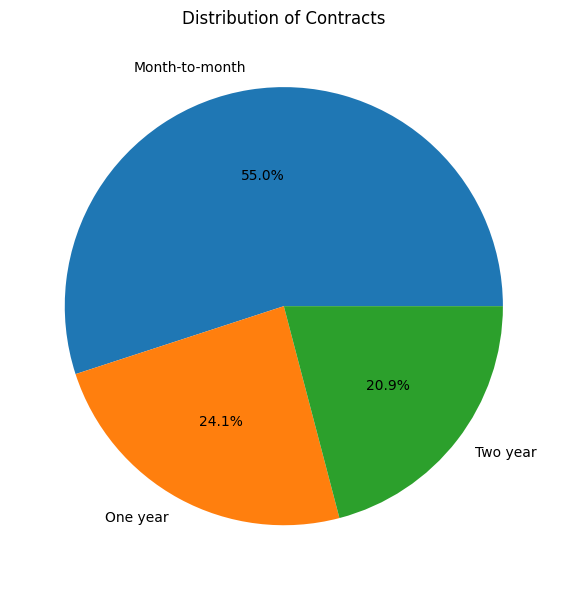

In [59]:
plt.figure(figsize=(12,6))
plt.pie(df['Contract'].value_counts(),labels=df['Contract'].unique(),autopct='%1.1f%%')
plt.title("Distribution of Contracts")
plt.tight_layout()
plt.show()

Observation: Most of the customers have month to month plan and the amount of customers decrease with long term plans

#### Churned

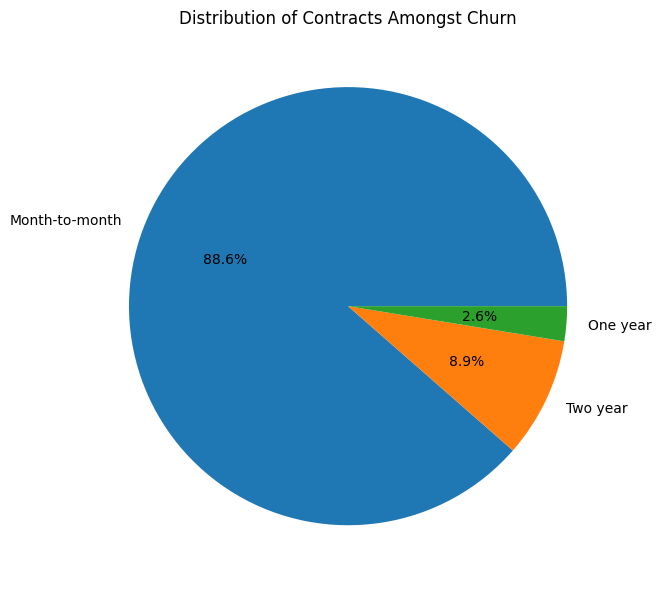

In [84]:
plt.figure(figsize=(12,6))
plt.pie(churned['Contract'].value_counts(),labels=churned['Contract'].unique(),autopct='%1.1f%%')
plt.title("Distribution of Contracts Amongst Churn")
plt.tight_layout()
plt.show()

Customers enrolled in long term plans are less likely to leave.

### Dependants

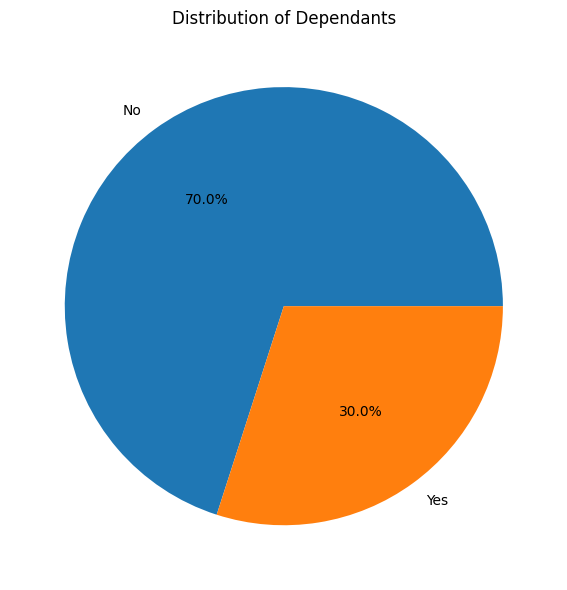

In [61]:
plt.figure(figsize=(12,6))
plt.pie(df['Dependents'].value_counts(),autopct='%1.1f%%',labels=df['Dependents'].unique())
plt.title('Distribution of Dependants')
plt.tight_layout()
plt.show()

### Partner

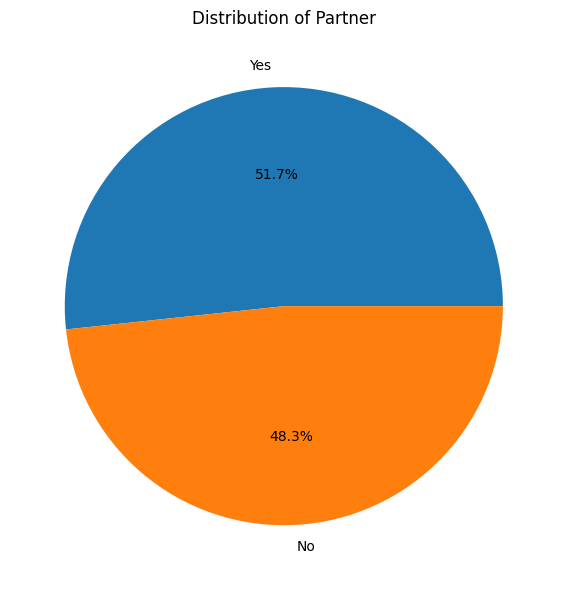

In [62]:
plt.figure(figsize=(12,6))
plt.pie(df['Partner'].value_counts(),autopct='%1.1f%%',labels=df['Partner'].unique())
plt.title('Distribution of Partner')
plt.tight_layout()
plt.show()

The population is almost equally divided into people with and without partner

### Senior Citizen

#### Overall

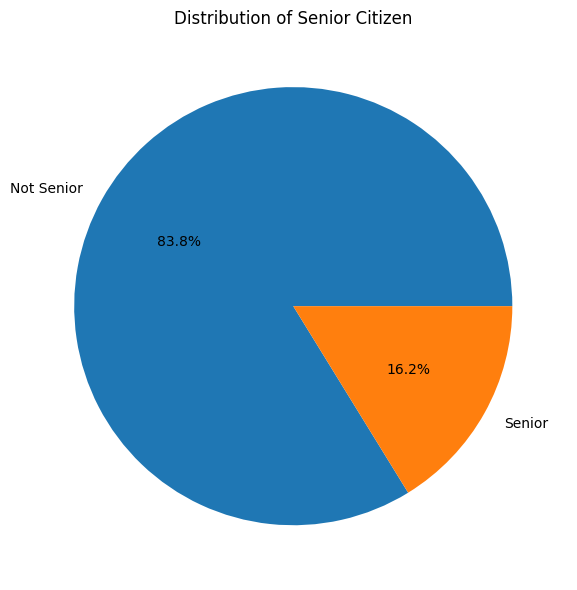

In [65]:
labels = df['SeniorCitizen'].map({0: 'Not Senior', 1: 'Senior'}).value_counts().index
plt.figure(figsize=(12,6))
plt.pie(df['SeniorCitizen'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.title('Distribution of Senior Citizen')
plt.tight_layout()
plt.show()

Maximum population doesn't belong to senior citizen category

# Visualizations

## Contracts vs Churn

## Gender vs Churn